<a href="https://colab.research.google.com/github/VikkiSui1129/6289HW/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/MyDrive/statistical deep learning/hw4")
import sys
sys.path.append("/content/drive/MyDrive/statistical deep learning/hw4")

In [4]:
!pip install pymagnitude flask

     |████████████████████████████████| 5.4 MB 5.2 MB/s 
  Created wheel for pymagnitude: filename=pymagnitude-0.1.143-cp37-cp37m-linux_x86_64.whl size=360404998 sha256=3c12bd963cd60177254024bd1b3d6b9e6a49ee4f16b3de36d8be2ba9e1b0f0e1
  Stored in directory: /root/.cache/pip/wheels/0e/96/d6/b765a1ce34517c193d764b634b1ff7db5e1dcfea2520f17273
Successfully built pymagnitude


In [7]:
from pymagnitude import *
file_path = "GoogleNews-vectors-negative300.magnitude"
vectors = Magnitude(file_path)

In [8]:
vectors.distance("cat", "dog")

0.69145405

### Questions

1. What is the dimensionality of these word embeddings? Provide an integer answer.

Answer: 300

In [9]:
vectors.dim

300

2. What are the top-5 most similar words to picnic (not including picnic itself)?

Answer: picnics, picnic_lunch, potluck_picnic, picnic_supper, picnicking

In [10]:
vectors.most_similar("picnic", topn = 10)

[('picnics', 0.7400875),
 ('picnic_lunch', 0.721374),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123),
 ('picnicking', 0.63550216),
 ('cookout', 0.63243484),
 ('Hiking_biking_camping', 0.6256069),
 ('barbeque', 0.62256277),
 ('barbecue', 0.6195759)]

3. According to the word embeddings, which of these words is not like the others? ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']

Answer: tissue

In [11]:
vectors.doesnt_match(['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette'])

'tissue'

4. Solve the following analogy: leg is to jump as X is to throw

Answer: forearm

In [12]:
vectors.most_similar(positive = ["leg", "throw"], negative = ["jump"])

[('forearm', 0.48294652),
 ('shin', 0.47376165),
 ('elbow', 0.4679689),
 ('metacarpal_bone', 0.46781474),
 ('metacarpal_bones', 0.46605822),
 ('ankle', 0.46434426),
 ('shoulder', 0.46183354),
 ('thigh', 0.45393682),
 ('knee', 0.4455707),
 ('ulna_bone', 0.4423491)]

 ### Describe some key functions, or main steps

Each word is embedding in a 300-dimention vector. To find this vector, we can query the word by function "query".

We can compute the distance between different words to calculate the similarity. By sorting this distance, we can get the result of function "most_similar". 

One intuitive explanation for how positive and negative words work in "most_similar" function is: Assume the positive vectors are $p_{1}$, ..., $p_{i}$ and the negative vectors are $n_{1}, ..., n_{j}$. Then we can find the most similar words by compute the distance with vector $\frac{1}{i-j}(p_{1} + ... + p_{i} - n_{1} - ... - n_{j})$.



### Visualization results

Lets find the covariance matrix for ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']

In [13]:
import numpy as np
select_words = ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']
vec_enc = vectors.query(select_words)
vec_cov = np.cov(vec_enc)


<Figure size 576x576 with 0 Axes>

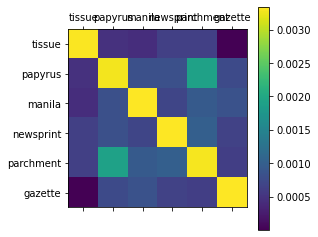

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.matshow(vec_cov)
plt.xticks([0,1,2,3,4,5], select_words)
plt.yticks([0,1,2,3,4,5], select_words)
plt.colorbar()
plt.show()

From the plot, we can see that the row and column where "tissue" is located has the smallest value, and it is least related to other words.